In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and display data

In [2]:
loaded_data = np.genfromtxt("../../data/3992_bad.dat", skip_header = 1, delimiter = ',')
Pid = 3992
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

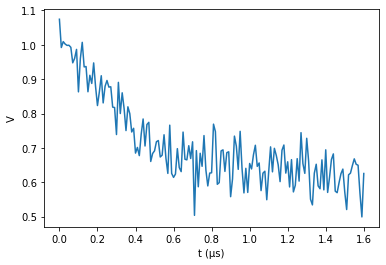

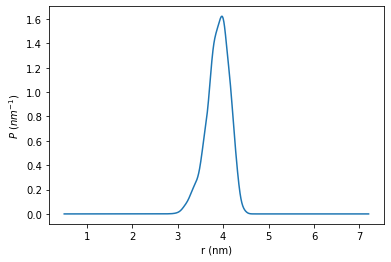

In [3]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## Regularization

In [5]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 3 chains for 1_000 tune and 5_000 draw iterations (3_000 + 15_000 draws total) took 5183 seconds.
There were 447 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5846667356948412, but should be close to 0.8. Try to increase the number of tuning steps.
There were 476 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6066783329275327, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2475 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2135774156063973, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some pa

mean          sd     hdi_3%      hdi_97%  mcse_mean    mcse_sd  \
k            0.066       0.036      0.000        0.124      0.006      0.005   
λ            0.313       0.027      0.258        0.359      0.005      0.003   
V₀           0.951       0.015      0.924        0.979      0.001      0.001   
σ            0.047       0.003      0.042        0.053      0.000      0.000   
δ      1219836.024  837633.418  33279.658  2724354.253  80740.588  57247.653   
lg(α)        1.662       0.174      1.329        1.959      0.019      0.014   

       ess_bulk  ess_tail  r_hat  
k          41.0      49.0   1.06  
λ          29.0      25.0   1.08  
V₀        251.0     506.0   1.03  
σ        9688.0   12386.0   1.00  
δ          84.0     116.0   1.03  
lg(α)      86.0     122.0   1.03

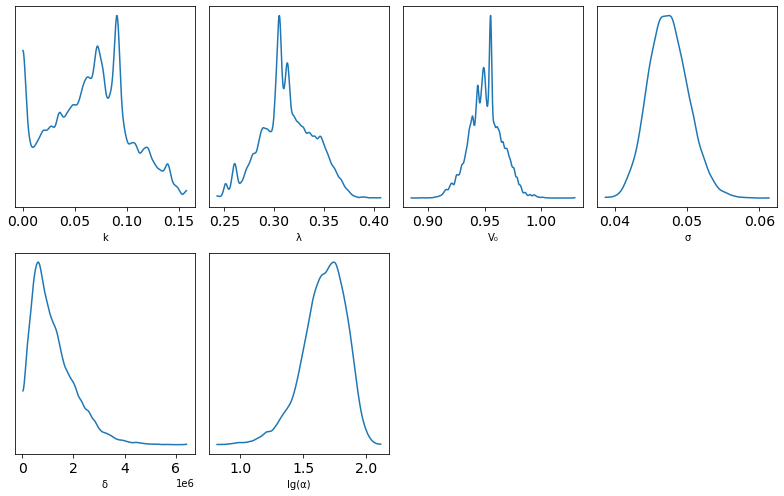

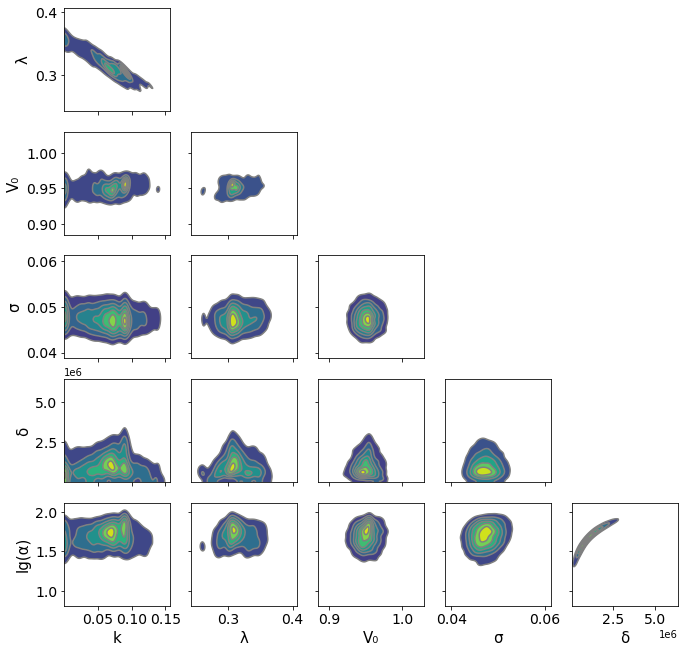

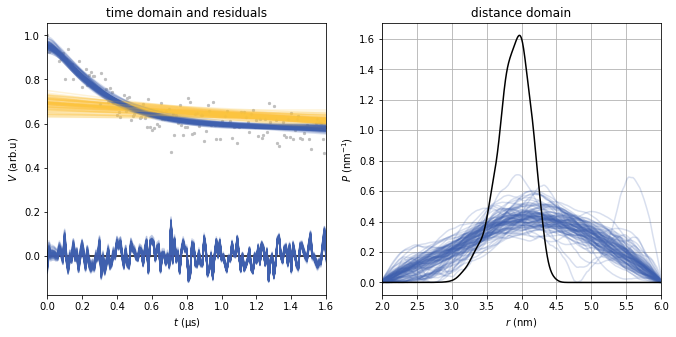

In [6]:
dive.summary(trace, model, Pid = Pid)  

## Single Gaussian

In [7]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 1}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 6000,"tune": 2000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, w, r0_rel]


Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 810 seconds.
There were 1825 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.487765996823987, but should be close to 0.8. Try to increase the number of tuning steps.
There were 782 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5967625915520831, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1585 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.474546010428579, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9109119887097983, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger th

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
r0[0]  4.126  0.136   3.895    4.388      0.040    0.029      12.0      87.0   
w[0]   1.434  0.730   0.156    2.718      0.244    0.179      10.0      54.0   
k      0.115  0.065   0.000    0.206      0.024    0.018       9.0      94.0   
λ      0.271  0.058   0.183    0.375      0.021    0.016       9.0      92.0   
V₀     0.942  0.016   0.911    0.971      0.003    0.002      42.0     969.0   
σ      0.047  0.003   0.042    0.053      0.000    0.000      87.0     257.0   

       r_hat  
r0[0]   1.25  
w[0]    1.33  
k       1.40  
λ       1.40  
V₀      1.07  
σ       1.05

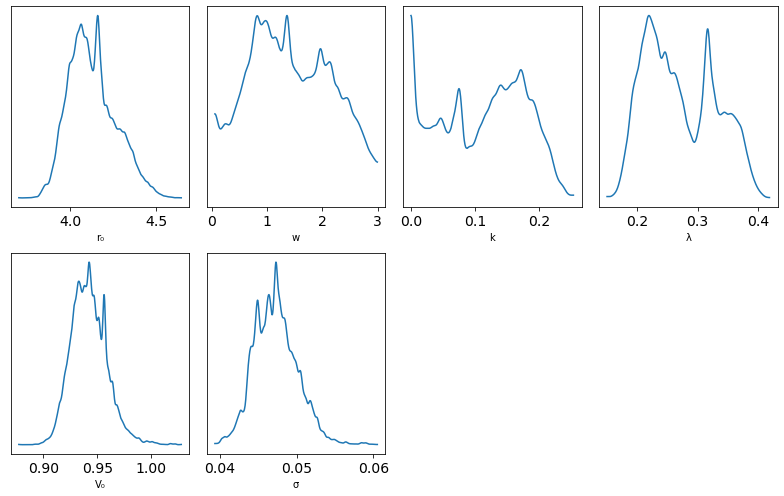

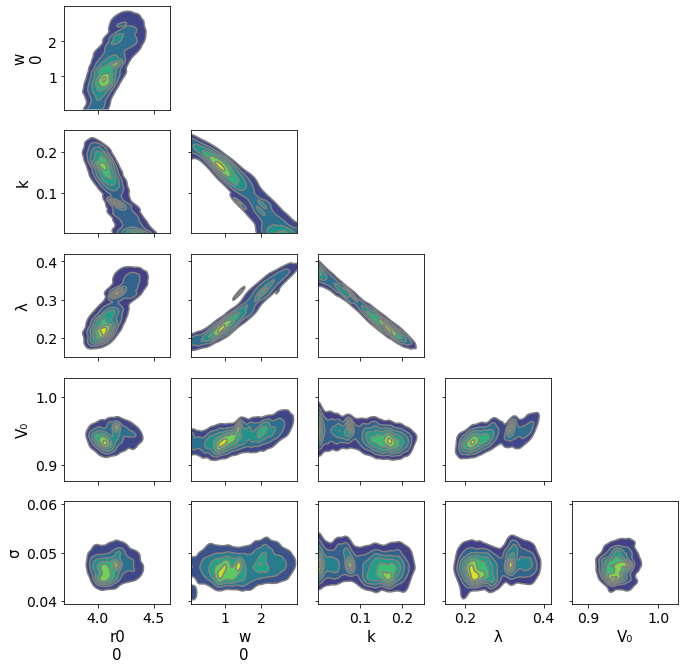

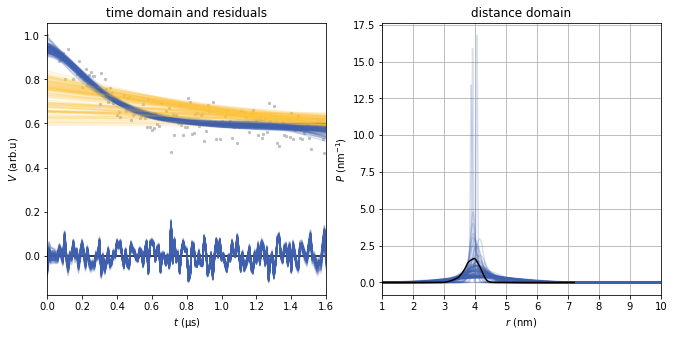

In [8]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  